In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest

In [3]:
df=pd.read_excel("C:\\Users\\garvi\\Downloads\\Syllabus\\Spotify Dataset Final.xlsx")

In [204]:
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,3.904709e+08,30716.0,196631588.0,...,40975.0,684.0,62.0,17598718.0,114.0,18004655.0,22931.0,4818457.0,2669262,0.0
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-04-05 00:00:00,USUG12400910,2,545.9,3.237039e+08,28113.0,174597137.0,...,40778.0,3.0,67.0,10422430.0,111.0,7780028.0,28444.0,6623075.0,1118279,1.0
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,6.013093e+08,54331.0,211607669.0,...,74333.0,536.0,136.0,36321847.0,172.0,5022621.0,5639.0,7208651.0,5285340,0.0
3,Flowers,Flowers - Single,Miley Cyrus,2023-12-01 00:00:00,USSM12209777,4,444.9,2.031281e+09,269802.0,136569078.0,...,1474799.0,2182.0,264.0,24684248.0,210.0,190260277.0,203384.0,NaN,11822942,0.0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,1.070349e+08,7223.0,151469874.0,...,12185.0,1.0,82.0,17660624.0,105.0,4493884.0,7006.0,207179.0,457017,1.0


# EDA AND VISUALIZATION

In [205]:
df.shape

(1041, 28)

In [206]:
df.info

<bound method DataFrame.info of                            Track                         Album Name  \
0            MILLION DOLLAR BABY       Million Dollar Baby - Single   
1                    Not Like Us                        Not Like Us   
2     i like the way you kiss me         I like the way you kiss me   
3                        Flowers                   Flowers - Single   
4                        Houdini                            Houdini   
...                          ...                                ...   
1036               Love wins all                      Love wins all   
1037                  Bubble Gum                          How Sweet   
1038          Abejita Chiquitita  Las Canciones de Plim Plim Vol. 8   
1039   Cake By The Ocean - Cover          NEW TIK&TOK - BUZZ BEST -   
1040                  BABY HELLO                BABY HELLO - Single   

                   Artist         Release Date          ISRC  All Time Rank  \
0           Tommy Richman           

In [207]:
df.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'Explicit Track'],
      dtype='object')

In [208]:
df.describe()

,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,...,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Explicit Track
count,1041.000000,1041.000000,1.013000e+03,1024.000000,1.024000e+03,879.000000,9.740000e+02,9.700000e+02,8.080000e+02,8.600000e+02,...,929.000000,9.260000e+02,708.000000,883.000000,8.830000e+02,883.000000,8.470000e+02,8.320000e+02,3.930000e+02,298.000000
mean,538.226705,87.084438,7.251567e+08,90522.702148,4.385500e+07,68.714448,7.033675e+08,5.254583e+06,1.874053e+06,2.112912e+08,...,102.534984,1.313791e+05,472.367232,61.812005,2.959877e+06,43.523216,1.119006e+08,1.261811e+05,2.077423e+07,0.436242
std,317.432289,60.584518,7.107342e+08,94402.457901,4.357003e+07,17.084052,1.140029e+09,7.405910e+06,3.832527e+06,8.593602e+08,...,105.657746,2.213916e+05,880.945959,86.190008,6.001677e+06,36.240947,1.851436e+08,3.347670e+05,4.357211e+07,0.496752
min,1.000000,45.300000,1.071000e+03,1.000000,1.000000e+00,1.000000,1.151200e+04,1.710000e+02,3.000000e+00,6.000000e+00,...,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,8.100000e+01,1.000000e+00,6.800000e+01,0.000000
25%,266.000000,54.000000,1.554431e+08,10813.250000,1.184786e+07,67.000000,7.590844e+07,7.784820e+05,1.627390e+05,1.954400e+07,...,24.000000,2.371500e+03,49.000000,12.000000,2.023745e+05,15.500000,3.144089e+06,3.194750e+03,9.922660e+05,0.000000
50%,527.000000,66.900000,5.092310e+08,57382.500000,3.200106e+07,73.000000,2.654483e+08,2.124493e+06,6.368955e+05,6.836231e+07,...,67.000000,3.247600e+04,173.000000,34.000000,8.306210e+05,35.000000,3.360898e+07,1.864200e+04,4.374049e+06,0.000000
75%,808.000000,95.600000,1.125681e+09,156525.000000,6.289068e+07,78.000000,8.877504e+08,7.169779e+06,1.933964e+06,2.069545e+08,...,152.000000,1.751905e+05,477.750000,74.000000,2.518179e+06,60.000000,1.330036e+08,8.587050e+04,1.662010e+07,1.000000
max,1105.000000,725.400000,4.281469e+09,590392.000000,2.623434e+08,96.000000,1.632276e+10,6.231118e+07,4.290000e+07,2.347422e+10,...,859.000000,1.777811e+06,7098.000000,632.000000,4.819785e+07,210.000000,1.394055e+09,3.395379e+06,3.198359e+08,1.000000


In [209]:
df.dtypes

Track                          object
Album Name                     object
Artist                         object
Release Date                   object
ISRC                           object
All Time Rank                   int64
Track Score                   float64
Spotify Streams               float64
Spotify Playlist Count        float64
Spotify Playlist Reach        float64
Spotify Popularity            float64
YouTube Views                 float64
YouTube Likes                 float64
TikTok Posts                  float64
TikTok Likes                  float64
TikTok Views                  float64
YouTube Playlist Reach        float64
Apple Music Playlist Count    float64
AirPlay Spins                 float64
SiriusXM Spins                float64
Deezer Playlist Count         float64
Deezer Playlist Reach         float64
Amazon Playlist Count         float64
Pandora Streams               float64
Pandora Track Stations        float64
Soundcloud Streams            float64
Shazam Count

In [210]:
df.isnull().sum()

Track                           0
Album Name                      0
Artist                          2
Release Date                    0
ISRC                            0
All Time Rank                   0
Track Score                     0
Spotify Streams                28
Spotify Playlist Count         17
Spotify Playlist Reach         17
Spotify Popularity            162
YouTube Views                  67
YouTube Likes                  71
TikTok Posts                  233
TikTok Likes                  181
TikTok Views                  181
YouTube Playlist Reach        156
Apple Music Playlist Count    112
AirPlay Spins                 115
SiriusXM Spins                333
Deezer Playlist Count         158
Deezer Playlist Reach         158
Amazon Playlist Count         158
Pandora Streams               194
Pandora Track Stations        209
Soundcloud Streams            648
Shazam Counts                 122
Explicit Track                743
dtype: int64

In [6]:
df = df[df['Shazam Counts']!='…....']
df['Shazam Counts'] = df['Shazam Counts'].fillna(0)

In [7]:
df['Shazam Counts'] = df['Shazam Counts'].astype(int)

In [8]:
df.dtypes

Track                          object
Album Name                     object
Artist                         object
Release Date                   object
ISRC                           object
All Time Rank                   int64
Track Score                   float64
Spotify Streams               float64
Spotify Playlist Count        float64
Spotify Playlist Reach        float64
Spotify Popularity            float64
YouTube Views                 float64
YouTube Likes                 float64
TikTok Posts                  float64
TikTok Likes                  float64
TikTok Views                  float64
YouTube Playlist Reach        float64
Apple Music Playlist Count    float64
AirPlay Spins                 float64
SiriusXM Spins                float64
Deezer Playlist Count         float64
Deezer Playlist Reach         float64
Amazon Playlist Count         float64
Pandora Streams               float64
Pandora Track Stations        float64
Soundcloud Streams            float64
Shazam Count

In [9]:
df['Shazam Counts'].head()

0     2669262
1     1118279
2     5285340
3    11822942
4      457017
Name: Shazam Counts, dtype: int32

In [215]:
df.isnull().sum()

Track                           0
Album Name                      0
Artist                          2
Release Date                    0
ISRC                            0
All Time Rank                   0
Track Score                     0
Spotify Streams                28
Spotify Playlist Count         17
Spotify Playlist Reach         17
Spotify Popularity            162
YouTube Views                  67
YouTube Likes                  71
TikTok Posts                  233
TikTok Likes                  181
TikTok Views                  181
YouTube Playlist Reach        156
Apple Music Playlist Count    112
AirPlay Spins                 115
SiriusXM Spins                333
Deezer Playlist Count         158
Deezer Playlist Reach         158
Amazon Playlist Count         158
Pandora Streams               194
Pandora Track Stations        209
Soundcloud Streams            647
Shazam Counts                   0
Explicit Track                743
dtype: int64

In [216]:
df.fillna(method='bfill',inplace=True)

In [217]:
df.isnull().sum()

Track                           0
Album Name                      0
Artist                          0
Release Date                    0
ISRC                            0
All Time Rank                   0
Track Score                     0
Spotify Streams                 0
Spotify Playlist Count          0
Spotify Playlist Reach          0
Spotify Popularity              0
YouTube Views                   0
YouTube Likes                   0
TikTok Posts                    0
TikTok Likes                    0
TikTok Views                    0
YouTube Playlist Reach          0
Apple Music Playlist Count      0
AirPlay Spins                   0
SiriusXM Spins                  0
Deezer Playlist Count           0
Deezer Playlist Reach           0
Amazon Playlist Count           0
Pandora Streams                 0
Pandora Track Stations          0
Soundcloud Streams              3
Shazam Counts                   0
Explicit Track                743
dtype: int64

In [218]:
df['Soundcloud Streams'].fillna(method='ffill', inplace=True)

In [219]:
df['Explicit Track'].fillna(method='ffill', inplace=True)

In [220]:
df['Explicit Track'].isnull().sum()

0

In [221]:
categorical_columns=df.select_dtypes(exclude=['number'])
categorical_columns

,Track,Album Name,Artist,Release Date,ISRC
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-04-05 00:00:00,USUG12400910
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387
3,Flowers,Flowers - Single,Miley Cyrus,2023-12-01 00:00:00,USSM12209777
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398
...,...,...,...,...,...
1036,Love wins all,Love wins all,IU,1/24/2024,KRA382400642
1037,Bubble Gum,How Sweet,NewJeans,5/24/2024,USA2P2414844
1038,Abejita Chiquitita,Las Canciones de Plim Plim Vol. 8,El Payaso Plim Plim,2023-08-09 00:00:00,ARLIB2220027
1039,Cake By The Ocean - Cover,NEW TIK&TOK - BUZZ BEST -,MUSIC LAB JPN,2023-07-06 00:00:00,TCJPV2340543


In [222]:
numerical_columns=df.select_dtypes(include=['number'])
numerical_columns

,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track
0,1,725.4,3.904709e+08,30716.0,196631588.0,92.0,8.427475e+07,1713126.0,5767700.0,6.515659e+08,...,40975.0,684.0,62.0,17598718.0,114.0,18004655.0,22931.0,4818457.0,2669262,0.0
1,2,545.9,3.237039e+08,28113.0,174597137.0,92.0,1.163470e+08,3486739.0,674700.0,3.522355e+07,...,40778.0,3.0,67.0,10422430.0,111.0,7780028.0,28444.0,6623075.0,1118279,1.0
2,3,538.4,6.013093e+08,54331.0,211607669.0,92.0,1.225991e+08,2228730.0,3025400.0,2.751542e+08,...,74333.0,536.0,136.0,36321847.0,172.0,5022621.0,5639.0,7208651.0,5285340,0.0
3,4,444.9,2.031281e+09,269802.0,136569078.0,85.0,1.096101e+09,10629796.0,7189811.0,1.078758e+09,...,1474799.0,2182.0,264.0,24684248.0,210.0,190260277.0,203384.0,207179.0,11822942,0.0
4,5,423.3,1.070349e+08,7223.0,151469874.0,88.0,7.737396e+07,3670188.0,16400.0,2.149435e+08,...,12185.0,1.0,82.0,17660624.0,105.0,4493884.0,7006.0,207179.0,457017,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,1100,45.6,6.090342e+07,4743.0,2755053.0,76.0,1.220031e+08,4890890.0,47200.0,1.025000e+05,...,3.0,5.0,1.0,4688.0,17.0,66751.0,159.0,53406.0,120507,0.0
1037,1101,45.6,2.063090e+07,1536.0,9077425.0,76.0,1.418598e+07,119016.0,47200.0,3.430000e+02,...,3.0,5.0,2.0,4710.0,10.0,48314.0,41.0,53406.0,33194,0.0
1038,1102,45.6,5.741262e+06,275.0,33239.0,68.0,2.729271e+08,395965.0,47200.0,3.430000e+02,...,14.0,6.0,1.0,16453.0,1.0,3542840.0,631.0,53406.0,6795,0.0
1039,1103,48.2,1.611085e+09,47936.0,46787442.0,68.0,6.904774e+07,591951.0,23400.0,9.362518e+06,...,39321.0,6.0,37.0,817012.0,36.0,3542840.0,631.0,53406.0,0,0.0


In [223]:
#artists with maximum spotify streams
print(df.nlargest(5, "Spotify Streams")[["Artist","Album Name", "Spotify Streams"]])  

            Artist                                     Album Name  \
55      The Weeknd                                Blinding Lights   
53      Ed Sheeran                                   Shape of You   
131  Lewis Capaldi                                         Breach   
114    Post Malone  Sunflower (Spider-Man: Into the Spider-Verse)   
19    Harry Styles                                      As It Was   

     Spotify Streams  
55      4.281469e+09  
53      3.909459e+09  
131     3.427499e+09  
114     3.358704e+09  
19      3.301815e+09  


In [224]:
#maximum youtube views and the artist 
print(df.nlargest(5, "YouTube Views")[["Artist","Album Name", "YouTube Views"]])  

            Artist                          Album Name  YouTube Views
27        Pinkfong                          Baby Shark   1.632276e+10
49      Luis Fonsi  Despacito (Featuring Daddy Yankee)   9.537136e+09
53      Ed Sheeran                        Shape of You   8.013997e+09
14  Kids With Buns                      bathroom floor   6.736502e+09
80      Ed Sheeran                            (Deluxe)   6.473699e+09


In [225]:
#maximum youtube playlist reach and artist
print(df.nlargest(5, "YouTube Playlist Reach")[["Artist","Album Name" ,"YouTube Playlist Reach"]]) 

              Artist  \
19      Harry Styles   
87             Adele   
734        Lady Gaga   
988  Black Eyed Peas   
529   Camila Cabello   

                                                           Album Name  \
19                                                          As It Was   
87                                                         Easy On Me   
734  Hold My Hand (Music From The Motion Picture "Top Gun: Maverick")   
988                                                   Don't You Worry   
529                                                           Familia   

     YouTube Playlist Reach  
19             7.289707e+09  
87             6.353555e+09  
734            5.867794e+09  
988            5.024735e+09  
529            4.973499e+09  


In [226]:
#maximum tiktok views 
print(df.nlargest(5, "TikTok Views")[["Artist","Album Name" ,"TikTok Views"]]) 

            Artist         Album Name  TikTok Views
964  Kevin MacLeod  SteamFun - Single  2.332323e+11
466         Kreepa        Cold As Ice  6.108856e+10
112     Tollan Kim          Aesthetic  3.387079e+10
249  David Jackson  Thoughts Feelings  2.393338e+10
250           CKay     CKay The First  2.393338e+10


In [227]:
#maximum pandora streams and artist 
print(df.nlargest(5, "Pandora Streams")[["Artist","Album Name", "Pandora Streams"]]) 

              Artist                                      Album Name  \
851      OneRepublic                               Native (Standard)   
644  Chris Stapleton                               Tennessee Whiskey   
637  Imagine Dragons                                      Hear Me EP   
813  Imagine Dragons                          Continued Silence - EP   
481      John Legend  Love In The Future (South Africa Tour Edition)   

     Pandora Streams  
851     1.394055e+09  
644     1.274749e+09  
637     1.108093e+09  
813     1.087794e+09  
481     1.043818e+09  


In [228]:
 #maximum soundcloud streams and artist 
print(df.nlargest(5, "Soundcloud Streams")[["Artist","Album Name", "Soundcloud Streams"]])

            Artist       Album Name  Soundcloud Streams
316   Lil Uzi Vert  Just Wanna Rock         319835943.0
317   XXXTENTACION               17         319835943.0
552   Lil Uzi Vert    XO TOUR Llif3         264706631.0
142         J Ross              Abc         257459352.0
143  Manuel Turizo       La Bachata         257459352.0


In [229]:
# Top 5 tracks with highest combined streams
df["Total Streams"] = (
    df["Spotify Streams"] +
    df["YouTube Views"] +
    df["Pandora Streams"] +
    df["Soundcloud Streams"]
)
print(df.nlargest(5, "Total Streams")[["Artist", "Track", "Total Streams"]])

          Artist                               Track  Total Streams
27      Pinkfong                          Baby Shark   1.713165e+10
53    Ed Sheeran                        Shape of You   1.273517e+10
49    Luis Fonsi                           Despacito   1.155514e+10
80    Ed Sheeran                             Perfect   1.006119e+10
245  Wiz Khalifa  See You Again (feat. Charlie Puth)   8.745191e+09


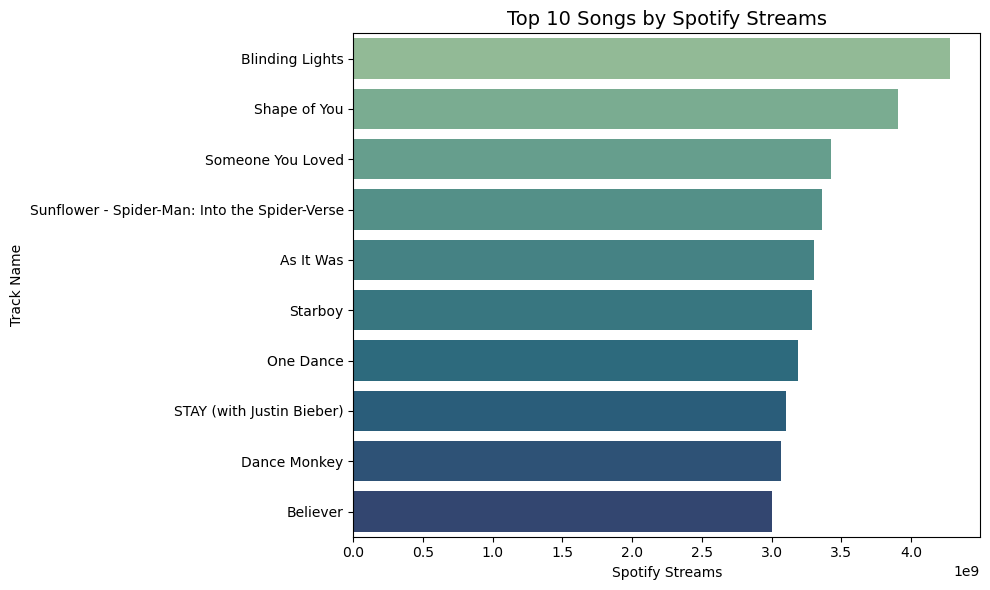

In [230]:
#Top 10 Songs by Streams
top_songs = df[['Track', 'Spotify Streams']].sort_values(by='Spotify Streams', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Spotify Streams', y='Track', data=top_songs, palette='crest')
plt.title('Top 10 Songs by Spotify Streams', fontsize=14)
plt.xlabel('Spotify Streams')
plt.ylabel('Track Name')
plt.tight_layout()
plt.show()

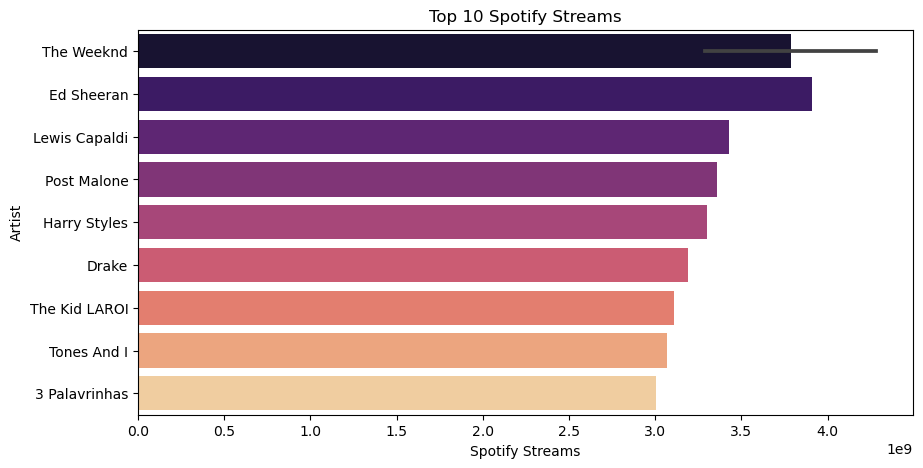

In [231]:
#Top 10 Songs by Streams Artist 
top_artist = df.nlargest(10, "Spotify Streams")[["Artist", "Spotify Streams"]]
plt.figure(figsize=(10, 5))
sns.barplot(x="Spotify Streams", y="Artist", data=top_artist,palette="magma")
plt.title("Top 10 Spotify Streams")
plt.show()

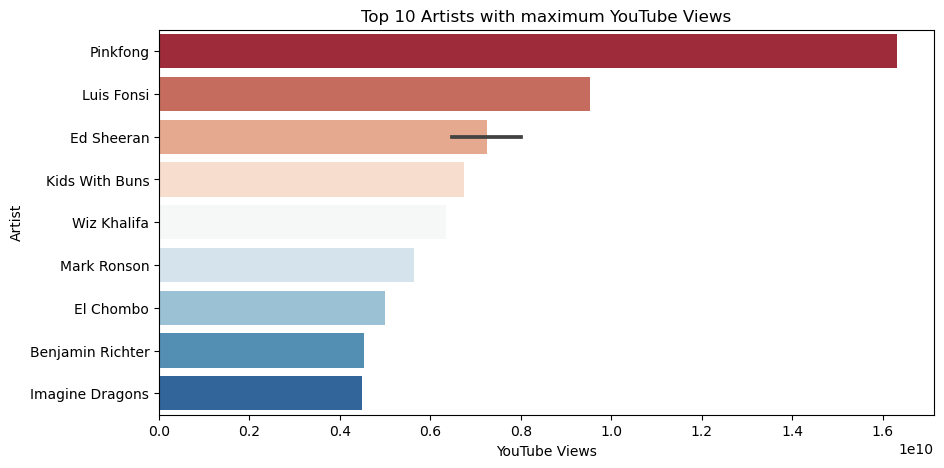

In [232]:
#top 10 artist with maximum YouTube Views
top_artist = df.nlargest(10, "YouTube Views")[["Artist", "YouTube Views"]] 
plt.figure(figsize=(10, 5))
sns.barplot(x="YouTube Views", y="Artist", data=top_artist,palette='RdBu')
plt.title("Top 10 Artists with maximum YouTube Views")
plt.show()

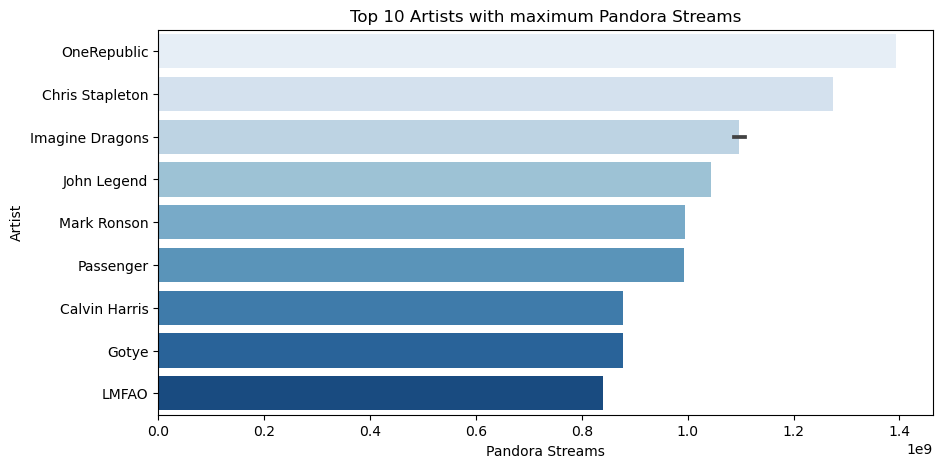

In [233]:
#top 10 artist with maximum Pandora Streams
top_artist = df.nlargest(10, "Pandora Streams")[["Artist", "Pandora Streams"]] 
plt.figure(figsize=(10, 5))
sns.barplot(x="Pandora Streams", y="Artist", data=top_artist,palette="Blues")
plt.title("Top 10 Artists with maximum Pandora Streams")
plt.show()

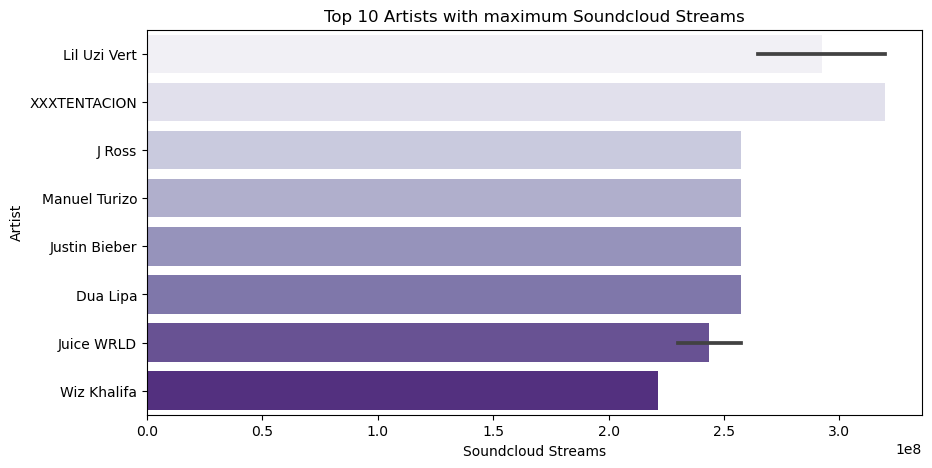

In [234]:
#top 10 artist with maximum Soundcloud Streams
top_artist = df.nlargest(10, "Soundcloud Streams")[["Artist", "Soundcloud Streams"]]
plt.figure(figsize=(10, 5))
sns.barplot(x="Soundcloud Streams", y="Artist", data=top_artist,palette="Purples")
plt.title("Top 10 Artists with maximum Soundcloud Streams")
plt.show()

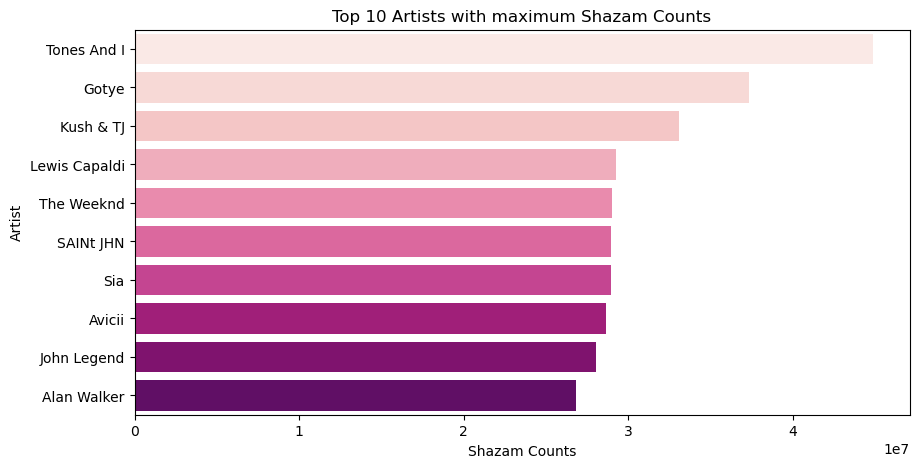

In [10]:
#top 10 artist with maximum Shazam Counts 
top_artist = df.nlargest(10, "Shazam Counts")[["Artist", "Shazam Counts"]] 
plt.figure(figsize=(10, 5))
sns.barplot(x="Shazam Counts", y="Artist", data=top_artist,palette="RdPu")
plt.title("Top 10 Artists with maximum Shazam Counts")
plt.show()

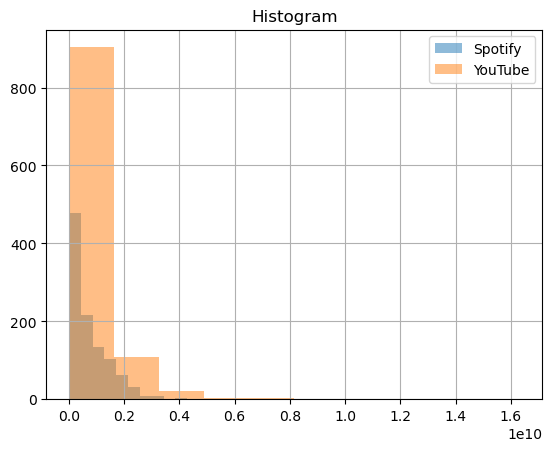

In [236]:
#Spotify Streams vs YouTube Views
df['Spotify Streams'].hist(alpha=0.5, label='Spotify')
df['YouTube Views'].hist(alpha=0.5, label='YouTube')
plt.title('Histogram')
plt.legend()
plt.show()

SORTING DATE 

In [237]:
def convert_date(x):
    if isinstance(x, pd.Timestamp):  
        return x.strftime('%d-%m-%Y')   #.strftime('%d-%m-%Y')  for formatting of date 
    x = str(x)
    for fmt in ('%m/%d/%Y', '%d-%m-%Y', '%Y-%m-%d %H:%M:%S'):
        try:
            return datetime.strptime(x, fmt).strftime('%d-%m-%Y')   #conversion into 'dd-mm-yyyy' format
        except ValueError:
            continue
    return x 

df['Release Date'] = df['Release Date'].apply(convert_date)

In [238]:
df.head(15)

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track,Total Streams
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,26-04-2024,QM24S2402528,1,725.4,3.904709e+08,30716.0,196631588.0,...,684.0,62.0,17598718.0,114.0,18004655.0,22931.0,4818457.0,2669262,0.0,4.975688e+08
1,Not Like Us,Not Like Us,Kendrick Lamar,05-04-2024,USUG12400910,2,545.9,3.237039e+08,28113.0,174597137.0,...,3.0,67.0,10422430.0,111.0,7780028.0,28444.0,6623075.0,1118279,1.0,4.544540e+08
2,i like the way you kiss me,I like the way you kiss me,Artemas,19-03-2024,QZJ842400387,3,538.4,6.013093e+08,54331.0,211607669.0,...,536.0,136.0,36321847.0,172.0,5022621.0,5639.0,7208651.0,5285340,0.0,7.361397e+08
3,Flowers,Flowers - Single,Miley Cyrus,01-12-2023,USSM12209777,4,444.9,2.031281e+09,269802.0,136569078.0,...,2182.0,264.0,24684248.0,210.0,190260277.0,203384.0,207179.0,11822942,0.0,3.317849e+09
4,Houdini,Houdini,Eminem,31-05-2024,USUG12403398,5,423.3,1.070349e+08,7223.0,151469874.0,...,1.0,82.0,17660624.0,105.0,4493884.0,7006.0,207179.0,457017,1.0,1.891099e+08
5,Lovin On Me,Lovin On Me,Jack Harlow,11-10-2023,USAT22311371,6,410.1,6.706654e+08,105892.0,175421034.0,...,4654.0,86.0,17167254.0,152.0,138529362.0,50982.0,9438601.0,4517131,1.0,9.497815e+08
6,Beautiful Things,Beautiful Things,Benson Boone,18-01-2024,USWB12307016,7,407.2,9.001588e+08,73118.0,201585714.0,...,429.0,168.0,48197850.0,154.0,65447476.0,57372.0,3679709.0,9990302,0.0,1.278009e+09
8,Danza Kuduro - Cover,Meet the Orphans,MUSIC LAB JPN,06-09-2024,TCJPA2463708,9,355.7,1.653018e+09,1.0,15.0,...,117.0,78.0,10800098.0,92.0,1005626.0,842.0,3679709.0,0,1.0,1.690439e+09
9,BAND4BAND (feat. Lil Baby),BAND4BAND (feat. Lil Baby),Central Cee,23-05-2024,USSM12404354,10,330.6,9.067657e+07,10400.0,184199419.0,...,117.0,78.0,10800098.0,92.0,1005626.0,842.0,3679709.0,666302,1.0,1.280972e+08
10,I Had Some Help (feat. Morgan Wallen),I Had Some Help,Post Malone,05-10-2024,USUM72404990,11,322.1,2.500804e+08,16219.0,168766158.0,...,71.0,60.0,12009073.0,114.0,23155471.0,21172.0,1594605.0,963413,1.0,3.070596e+08


In [239]:
from datetime import datetime

In [240]:
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')
df = df.dropna(subset=['Release Date'])

In [241]:
df['Release Year'] = df['Release Date'].dt.year   #extracting the Release Year

In [242]:
today = pd.Timestamp(datetime.today())   #how many days ago the track was released
df['Days Since Release'] = (today - df['Release Date']).dt.days  #how fast each song is getting streams.

In [243]:
#how fast each song is getting streams
df['Streams Per Day'] = df['Spotify Streams'] / df['Days Since Release']

In [244]:
#groups all the songs released in the same year
#calculates the average number of total streams and streams per day for each year
yearly_stats = df.groupby('Release Year')[['Spotify Streams', 'Streams Per Day']].mean().reset_index()

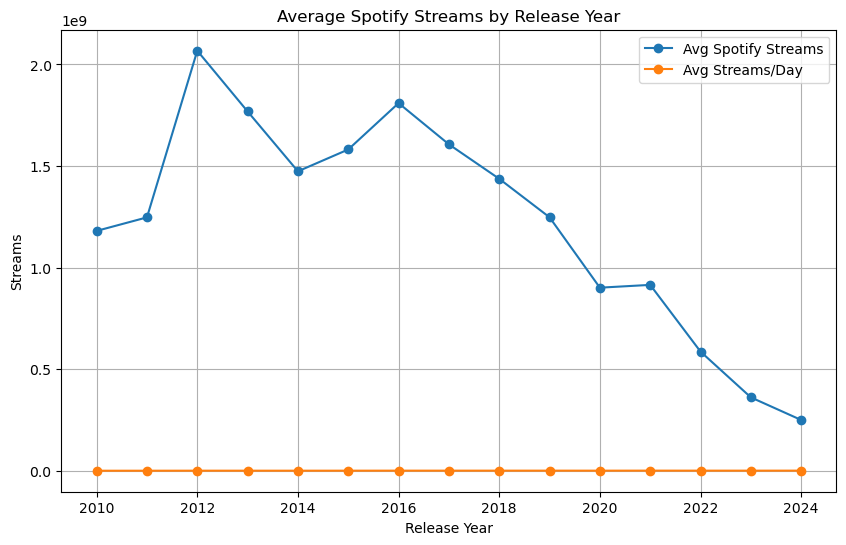

In [245]:
#visualize: The average total streams per year and the average streams per day per year
plt.figure(figsize=(10, 6))
plt.plot(yearly_stats['Release Year'], yearly_stats['Spotify Streams'], marker='o', label='Avg Spotify Streams')
plt.plot(yearly_stats['Release Year'], yearly_stats['Streams Per Day'], marker='o', label='Avg Streams/Day')
plt.title('Average Spotify Streams by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Streams')
plt.legend()
plt.grid(True)
plt.show()

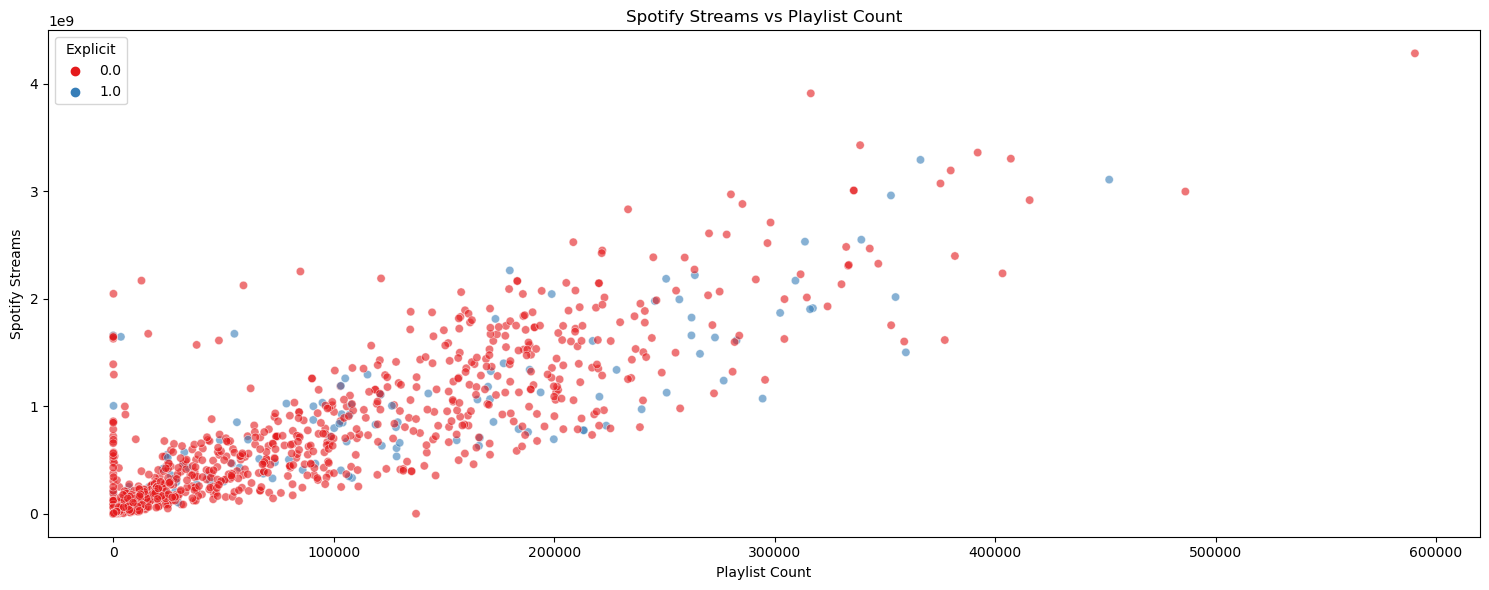

In [246]:
#Spotify Streams vs. Playlist Count
plt.figure(figsize=(15, 6))
sns.scatterplot(data=df, x='Spotify Playlist Count', y='Spotify Streams', hue='Explicit Track', palette='Set1', alpha=0.6)
plt.title('Spotify Streams vs Playlist Count')
plt.xlabel('Playlist Count')
plt.ylabel('Spotify Streams')
plt.legend(title='Explicit')
plt.tight_layout()
plt.show()

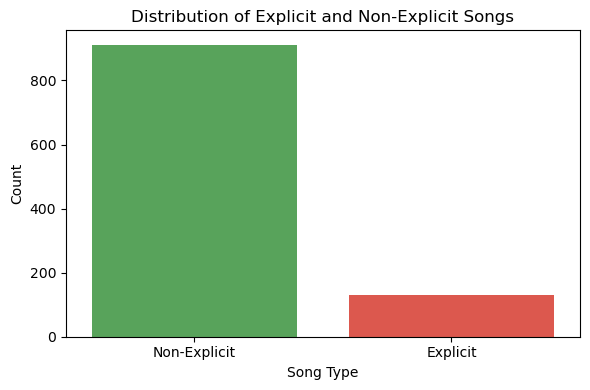

In [247]:
# Explicit vs Non-Explicit Song Distribution
plt.figure(figsize=(6, 4))
# Count values
explicit_counts = df['Explicit Track'].value_counts()


colors = ['#4CAF50', '#F44336']  

sns.barplot(x=explicit_counts.index, y=explicit_counts.values, palette=custom_colors)
plt.xticks([0, 1], ['Non-Explicit', 'Explicit'])
plt.title('Distribution of Explicit and Non-Explicit Songs')
plt.ylabel('Count')
plt.xlabel('Song Type')
plt.tight_layout()
plt.show()


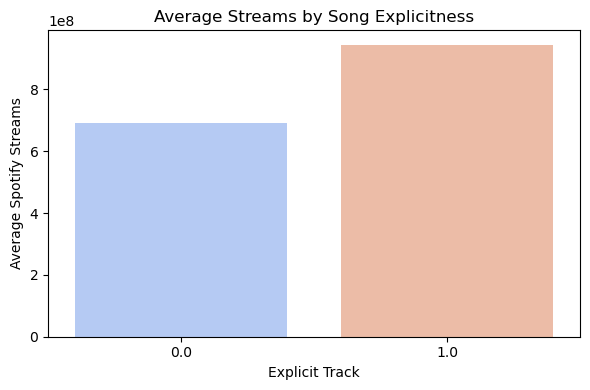

In [248]:
#group by 'Explicit Track' and calculate average Spotify Streams
avg_streams_by_explicit = df.groupby('Explicit Track')['Spotify Streams'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x='Explicit Track', y='Spotify Streams', data=avg_streams_by_explicit, palette='coolwarm')
plt.title('Average Streams by Song Explicitness')
plt.ylabel('Average Spotify Streams')
plt.tight_layout()
plt.show()


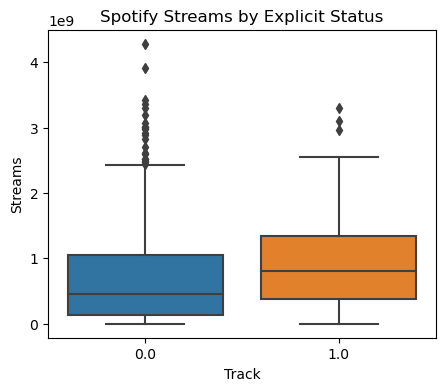

In [249]:
#Boxplot 
#Explicit tracks tend to perform slightly better on average in terms of Spotify streams
plt.figure(figsize=(5, 4))
sns.boxplot(x='Explicit Track', y='Spotify Streams', data=df)
plt.title('Spotify Streams by Explicit Status')
plt.xlabel('Track')
plt.ylabel('Streams')
plt.show()

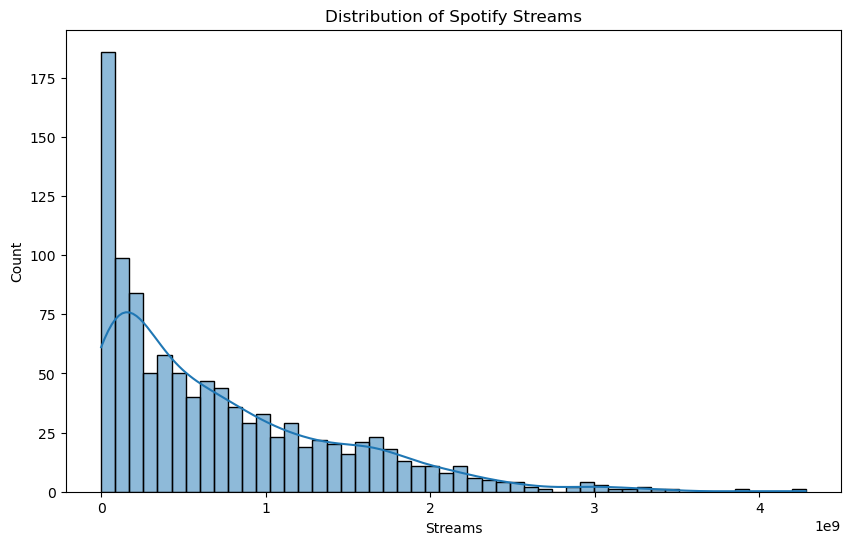

In [250]:
#Distribution of Spotify Streams
plt.figure(figsize=(10, 6))
sns.histplot(df['Spotify Streams'], bins=50, kde=True)
plt.title('Distribution of Spotify Streams')
plt.xlabel('Streams')
plt.ylabel('Count')
plt.show()

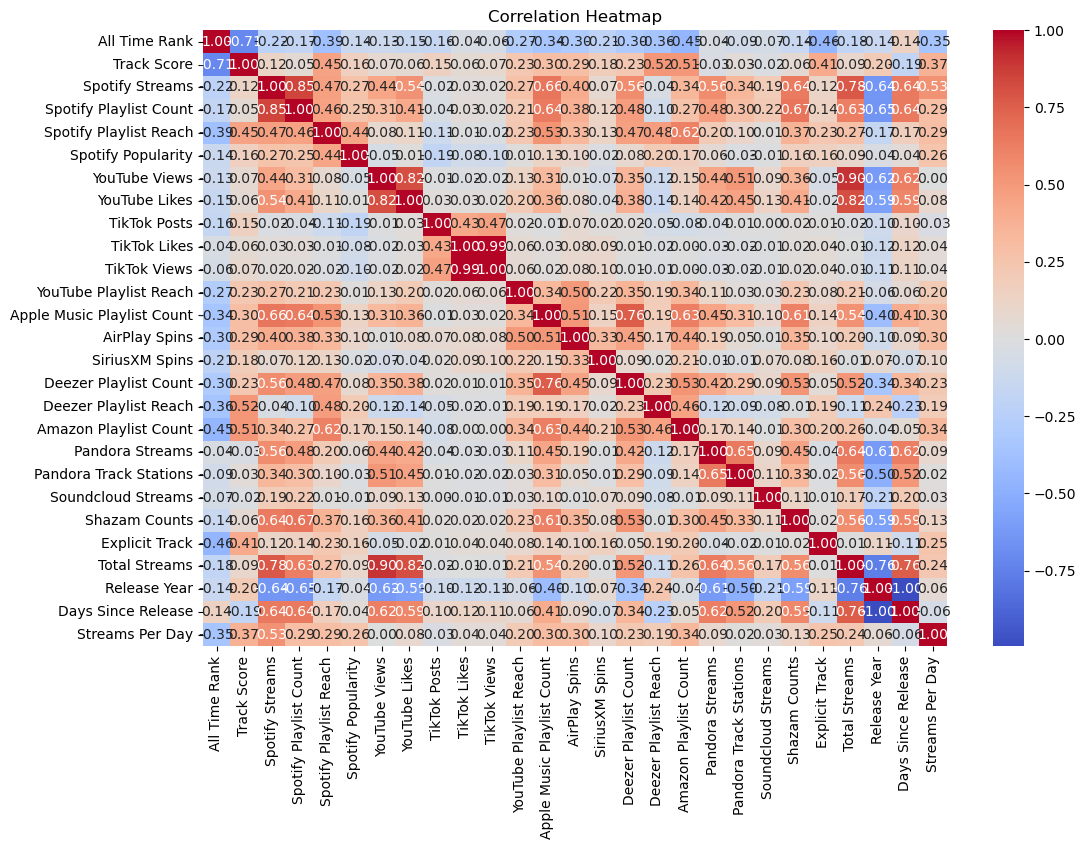

In [251]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [252]:
# Define your numeric columns
numeric_cols = ['Spotify Streams', 'Track Score', 'Spotify Playlist Count', 'Shazam Counts']

# Clean and convert to numeric
for col in numeric_cols:
    df[col] = df[col].astype(str).str.replace(r'[^\d.]', '', regex=True)  # remove anything that is not a digit or dot
    df[col] = pd.to_numeric(df[col], errors='coerce')  # convert to float, converting bad values to NaN

In [253]:
# Check how many values became NaN after cleaning
for col in numeric_cols:
    print(f"{col}: {df[col].isna().sum()} NaN values")

Spotify Streams: 0 NaN values
Track Score: 0 NaN values
Spotify Playlist Count: 0 NaN values
Shazam Counts: 0 NaN values


In [254]:
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

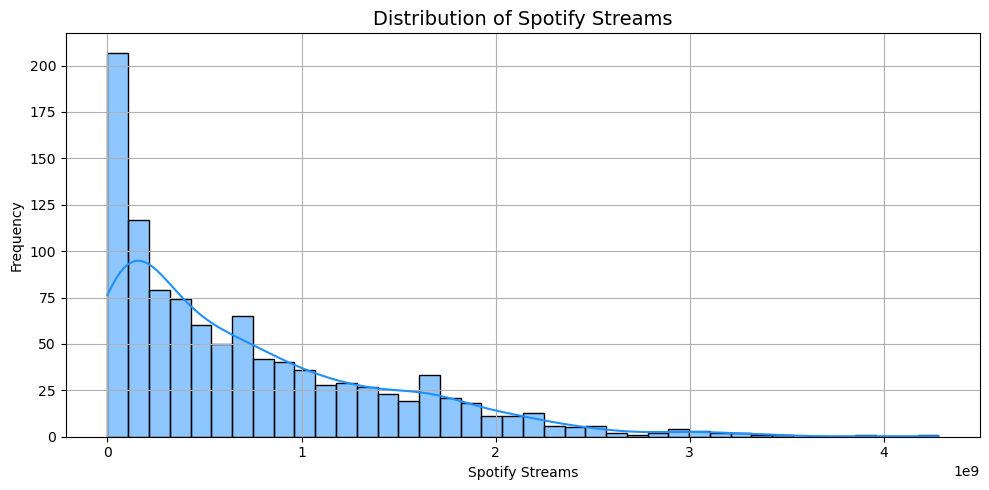

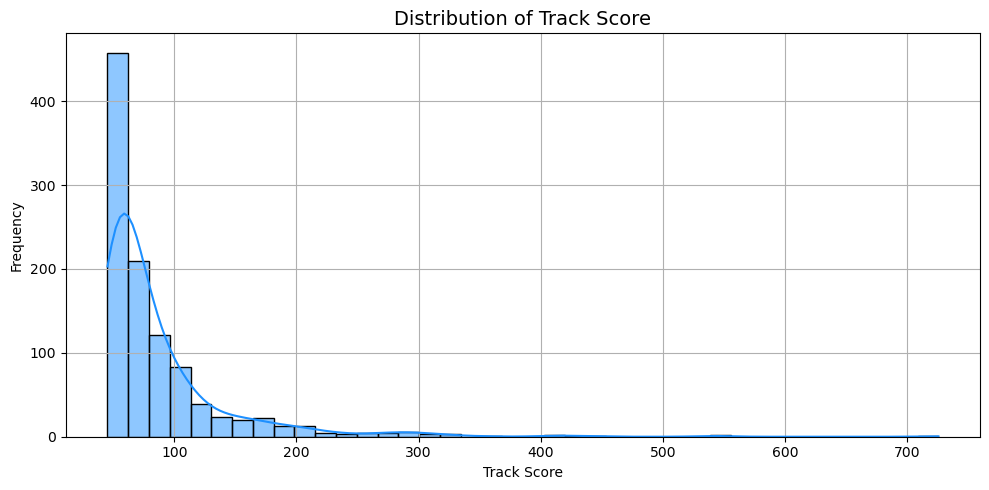

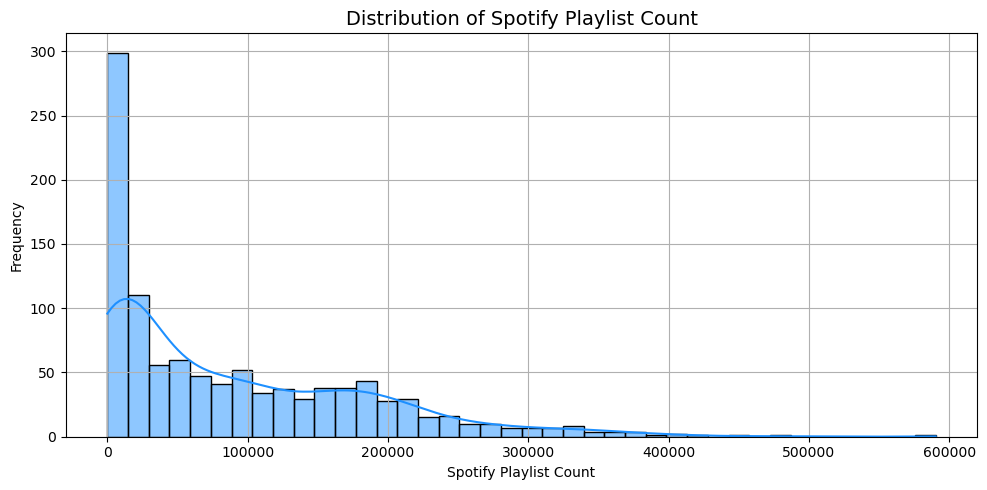

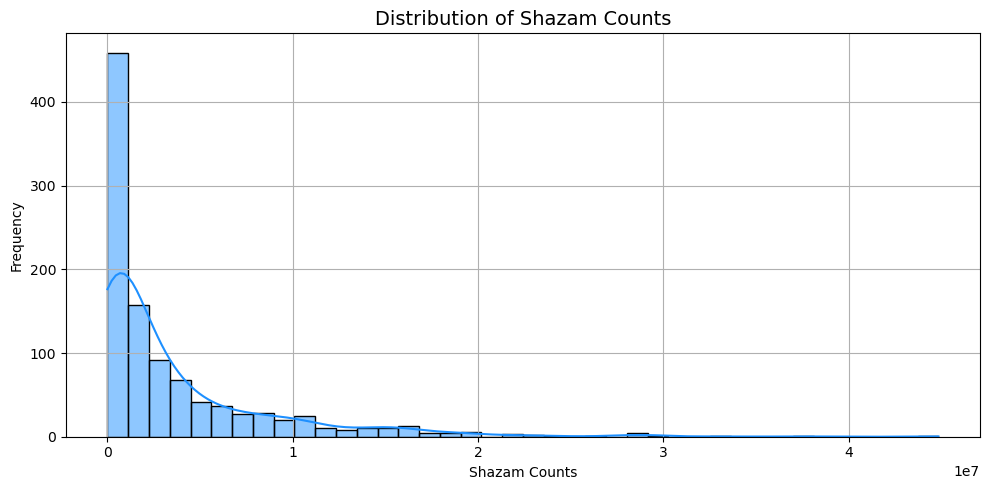

In [255]:
for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], bins=40, kde=True, color='dodgerblue')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# HYPOTHESIS TESTING(T-TEST)

H0: Mean streams for explicit and non-explicit songs are the same
H1: Mean streams for explicit and non-explicit songs are different

In [256]:
explicit_streams = df[df['Explicit Track'] == 1]['Spotify Streams']
non_explicit_streams = df[df['Explicit Track'] == 0]['Spotify Streams']

print(f"\nExplicit group size: {len(explicit_streams)}, Non-explicit group size: {len(non_explicit_streams)}")
print(f"Explicit nulls: {explicit_streams.isnull().sum()}, Non-explicit nulls: {non_explicit_streams.isnull().sum()}")

# Perform t-test 
t_stat, p_value = stats.ttest_ind(explicit_streams, non_explicit_streams, equal_var=False)

print(f"\nT-test Results:\nT-statistic = {t_stat:.2f}, P-value = {p_value:.4f}")
if p_value < 0.05:
    print("\nRejecting null hypothesis. There is a significant difference in mean Spotify streams between explicit and non-explicit track.")
else:
    print("\nCan not reject the null hypothesis. No significant difference in mean Spotify streams between explicit and non-explicit track.")


Explicit group size: 129, Non-explicit group size: 911
Explicit nulls: 0, Non-explicit nulls: 0

T-test Results:
T-statistic = 3.79, P-value = 0.0002

Rejecting null hypothesis. There is a significant difference in mean Spotify streams between explicit and non-explicit track.


# NATURAL LANGUAGE PROCESSING 

In [260]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [261]:
from better_profanity import profanity 

In [262]:
#BINDING LIGHTS
text = open("song1.txt").read().lower()
words = word_tokenize(text)
words = [w for w in words if w.isalpha()]  
clean_text = ' '.join(words)

profanity.load_censor_words()
if profanity.contains_profanity(clean_text):
    print("explicit")
else:
    print("not explicit")


not explicit


In [263]:
#SHAPE OF YOU 
text = open("song2.txt").read().lower()
words = word_tokenize(text)
words = [w for w in words if w.isalpha()]  
clean_text = ' '.join(words)

profanity.load_censor_words()
if profanity.contains_profanity(clean_text):
    print("explicit")
else:
    print("not explicit")


not explicit


In [264]:
#SOMEONE YOU LOVED
text = open("song3.txt").read().lower()
words = word_tokenize(text)
words = [w for w in words if w.isalpha()]  
clean_text = ' '.join(words)

profanity.load_censor_words()
if profanity.contains_profanity(clean_text):
    print("explicit")
else:
    print("not explicit")


not explicit


In [265]:
#SUNFLOWER-SPIDER-MAN
text = open("song4.txt").read().lower()
words = word_tokenize(text)
words = [w for w in words if w.isalpha()]  
clean_text = ' '.join(words)

profanity.load_censor_words()
if profanity.contains_profanity(clean_text):
    print("explicit")
else:
    print("not explicit")


not explicit


In [266]:
#AS IT WAS
text = open("song5.txt").read().lower()
words = word_tokenize(text)
words = [w for w in words if w.isalpha()]  
clean_text = ' '.join(words)

profanity.load_censor_words()
if profanity.contains_profanity(clean_text):
    print("explicit")
else:
    print("not explicit")


not explicit


In [267]:
#STARBOY
text = open("song6.txt").read().lower()
words = word_tokenize(text)
words = [w for w in words if w.isalpha()]  
clean_text = ' '.join(words)

profanity.load_censor_words()
if profanity.contains_profanity(clean_text):
    print("explicit")
else:
    print("not explicit")


explicit


In [268]:
#ONE DANCE
text = open("song7.txt").read().lower()
words = word_tokenize(text)
words = [w for w in words if w.isalpha()]  
clean_text = ' '.join(words)

profanity.load_censor_words()
if profanity.contains_profanity(clean_text):
    print("explicit")
else:
    print("not explicit")


not explicit


In [269]:
#STAY
text = open("song8.txt").read().lower()
words = word_tokenize(text)
words = [w for w in words if w.isalpha()]  
clean_text = ' '.join(words)

profanity.load_censor_words()
if profanity.contains_profanity(clean_text):
    print("explicit")
else:
    print("not explicit")


explicit


In [270]:
#DANCE MONKEY
text = open("song9.txt").read().lower()
words = word_tokenize(text)
words = [w for w in words if w.isalpha()]  
clean_text = ' '.join(words)

profanity.load_censor_words()
if profanity.contains_profanity(clean_text):
    print("explicit")
else:
    print("not explicit")


explicit


In [277]:
#Believer
text = open("song10.txt").read().lower()
words = word_tokenize(text)
words = [w for w in words if w.isalpha()]  
clean_text = ' '.join(words)

profanity.load_censor_words()
if profanity.contains_profanity(clean_text):
    print("explicit")
else:
    print("not explicit")


not explicit


In [278]:
data = {
    "Song": [
        "Blinding Lights", "Shape of You", "Someone You Loved", "Sunflower",
        "As it was", "Starboy", "One Dance", "STAY", "Dance Monkey", "Believer"
    ],
    "Explicit": [
        "not explicit", "not explicit", "not explicit", "not explicit",
        "not explicit", "explicit", "not explicit", "explicit",
        "explicit", "not explicit"
    ]
}

In [288]:
df = pd.DataFrame(data)

In [289]:
grouped_df = df.groupby("Explicit")["Song"].apply(list).reset_index()

In [290]:
order = ["not explicit", "explicit"]
grouped_df["Explicit"] = pd.Categorical(grouped_df["Explicit"], categories=order, ordered=True)
grouped_df = grouped_df.sort_values("Explicit").reset_index(drop=True)

In [291]:
grouped_df

,Explicit,Song
0,not explicit,"[Blinding Lights, Shape of You, Someone You Loved, Sunflower, As it was, One Dance, Believer]"
1,explicit,"[Starboy, STAY, Dance Monkey]"
